<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [50]:
import seaborn as sns
from scipy.stats import pearsonr

Загрузить датасет по url:


In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [26]:
df = df.dropna()
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Данное распределение является нормальным, несмещенным. 

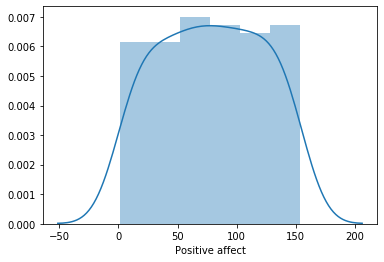

In [29]:
sns_plot = sns.distplot(df['Positive affect'])
fig = sns_plot.get_figure()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [47]:
#print('Значение моды: ', statistics.mode(df['Freedom']))
print('Медиана: ', statistics.median(df['Freedom']))
print('Математическое ожидание: ', statistics.mean(df['Freedom']))
print('Минимум: ', min(df['Freedom']))
print('Максимум: ', max(df['Freedom']))
print("Размах: ", max(df['Freedom']) - min(df['Freedom']))
print("Стандартное отклонение: ", statistics.pstdev(df['Freedom']))
print("Дисперсия: ", statistics.pvariance(df['Freedom']))



if df['Freedom'].isnull().sum() == 0:
    print('Выбросы отсутсвуют')



Медиана:  79.5
Математическое ожидание:  78.82857142857142
Минимум:  1.0
Максимум:  155.0
Размах:  154.0
Стандартное отклонение:  44.9475794449399
Дисперсия:  2020.2848979591836
Выбросы отсутсвуют


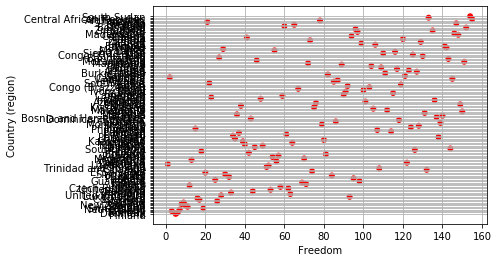

In [40]:
Freedom = df['Freedom']
Country = df['Country (region)']
fig, ax = plt.subplots()
ax.scatter(Freedom, Country, c='red', alpha=1, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Country (region)')
plt.show()

Почему нельзя найти моду?

Так как мода не расчитывется, можно сделать вывод, что в выборке отсутсвуют повторяющиеся значения. 

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.696567045809068


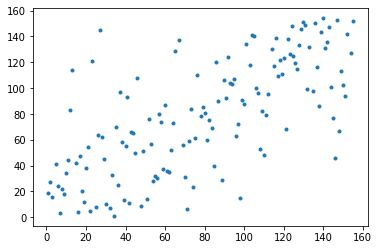

In [51]:
corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
plt.scatter(df['Freedom'], df['Positive affect'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Положительное значение коэфициента говорит о наличии коррекляции между показателями. При этом значение 0,6966 свидетельствует о значительной степени корреляции. 

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [54]:
Freedom = df['Freedom'] - statistics.mean(df['Freedom'])
#print(statistics.mean(Freedom))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_2 = min_max_scaler.fit_transform(np.array(Freedom).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

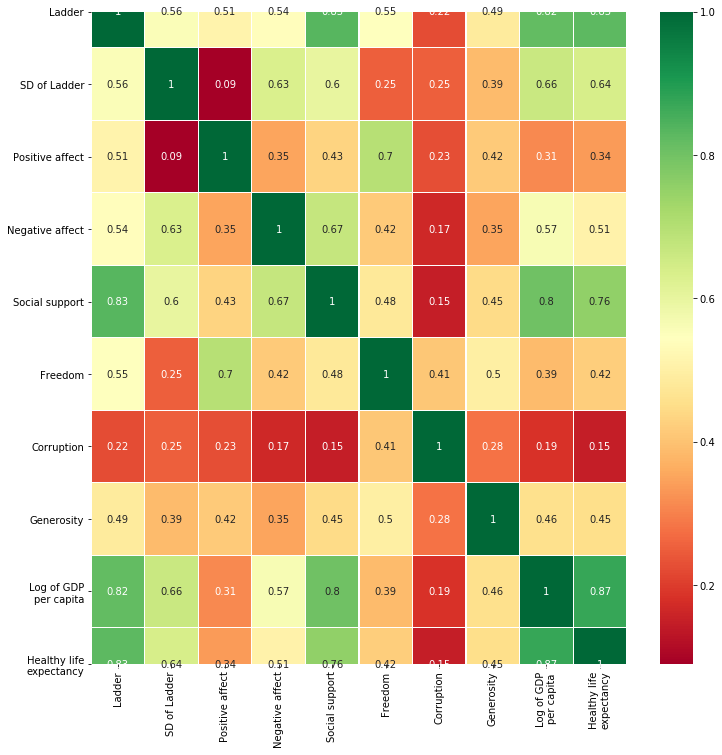

In [57]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


Загрузить таблицу цен на авокадо: 

In [58]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

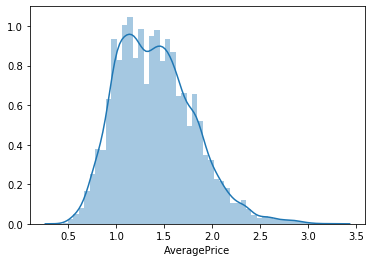

In [59]:
sns_plot = sns.distplot(df['AveragePrice'])
fig = sns_plot.get_figure()

На рисунке представлено нормальное распределение, смещенное влево

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [67]:
corr, p_value = pearsonr(df['AveragePrice'], df['4046'])
corr_1, p_value = pearsonr(df['AveragePrice'], df['4225'])
corr_2, p_value = pearsonr(df['AveragePrice'], df['4770'])
print('Коэффициент корреляции Пирсона между колонками AveragePrice и 4046:', corr, "Так как коэфициент отрицательный - корреляция незначительная")
print('Коэффициент корреляции Пирсона между колонками AveragePrice и 4225:', corr_1, "Так как коэфициент отрицательный - корреляция незначительная")
print('Коэффициент корреляции Пирсона между колонками AveragePrice и 4770:', corr_2, "Так как коэфициент отрицательный - корреляция незначительная")
print("Так как все значения корреляции являются отрицательными, то есть указывают на обратную корреляцию,можно сделать вывод, что сравниваемые параметры не зависят друг от друга")

Коэффициент корреляции Пирсона между колонками AveragePrice и 4046: -0.20831704848788404 Так как коэфициент отрицательный - корреляция незначительная
Коэффициент корреляции Пирсона между колонками AveragePrice и 4225: -0.17292777250933516 Так как коэфициент отрицательный - корреляция незначительная
Коэффициент корреляции Пирсона между колонками AveragePrice и 4770: -0.17944598397975564 Так как коэфициент отрицательный - корреляция незначительная
Так как все значения корреляции являются отрицательными, то есть указывают на обратную корреляцию,можно сделать вывод, что сравниваемые параметры не зависят друг от друга
